In [ ]:
!sudo apt -q install tesseract-ocr
!pip -q install pytesseract

Reading package lists...
Building dependency tree...
Reading state information...
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 16 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (3,465 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Di

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as plt
import cv2
import os
from PIL import Image
import pytesseract
from datetime import datetime
import argparse
from ipywidgets import Video, Image
from IPython.display import display
import base64
import timeit

In [ ]:
zoom_video_file_name = "Test_Video.mp4"
output_path = "."

In [ ]:
# The helper function for text extract from frames
def getText(img):
    HSV_img = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
    h,s,v = cv2.split(HSV_img)
    v = cv2.GaussianBlur(v, (1,1), 0)
    thresh = cv2.threshold(v, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, ksize=(1, 2))
    thresh = cv2.dilate(thresh, kernel)
    txt = pytesseract.image_to_string(thresh) #, config="--psm 6 digits")
    return txt

In [ ]:
# Time to extract the text from frames of the video clip
def video2text( video_file):
    cap = cv2.VideoCapture(video_file)
    index = 0
    timeseries = []
    while cap.isOpened():
        Ret, Frame = cap.read()
        if Ret:
            index += 1
            ### Extract text here
            text = getText(Frame).split()
            timeseries.append([datetime.strptime(text[0] + ' ' + text[1], '%H:%M:%S %p').time(), float(text[2])])
        else:
            break
    cap.release()
    return timeseries

In [ ]:
starttime = timeit.default_timer()
data = video2text(zoom_video_file_name)
print("The time difference is :", timeit.default_timer() - starttime)

The time difference is : 1622.515233698


In [ ]:
df = pd.DataFrame(data, columns=['Time stamp', 'Data'])
df.head()

,Time stamp,Data
0,11:22:38,371.49
1,11:22:38,371.49
2,11:22:38,371.49
3,11:22:38,371.49
4,11:22:39,377.05


<Axes: xlabel='Time stamp'>

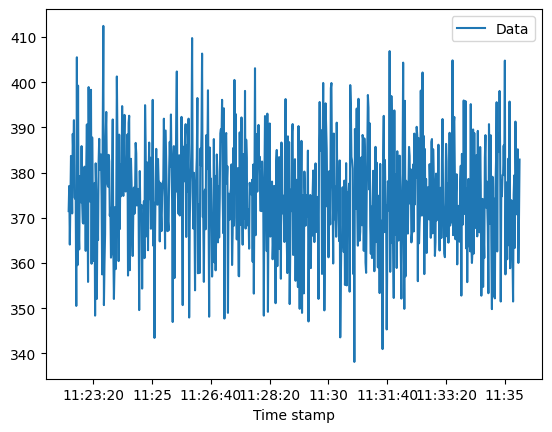

In [ ]:
df.plot(x='Time stamp', y='Data')